In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [2]:
#QUESTIONS
#WHAT FACTORS DETERMINE WHO WILL WIN A GP PER GP?
#How did lap times change over time per GP
#Is there a relationship between a constructor and GP 
#Is ther a relationship between driver and GP
#Check correlation and GP wins for rest of the variables
#Top racers win ratio at each GP (plot how many win per driver in GP - top 10)

#1- plot wins per gp
#2- plot lap times vs win per gp
#3- plot different paraemters vs wins per gp

In [3]:
#ANALYSIS
#By constructor over the years (secondsXYear)
#duration by constructor (secondsXconstructor)
#Seconds by circuit
#pit stop distribution in general
#distribution by circuit
#distribution by constructor
#laps per position, correlation graph

In [4]:
#ANALYSIS
#0. Intro
    #0.0 DEFINE QUESTIONS/WHAT ARE YOU GOING TO EXPLORE
    #0.1 Import packages

#1. cleandata
    #1.1 Read data
    #1.2 check data types (.info())
    #1.3 check check na values 
    #1.4 Check for na values. visualize na values in heatmap
        #0.4.1 determine why are they missing: missing completely at random, missing at ranodm, missing not at random.
        #0.4.2 in case of not at random, find most common ocurrence (median) and fill the values with that
    #1.5 Remove redundant variableS
    #1.6 CHECK NA PERCENTAGES. Remove columns that have 40%+ null values (REPLACE VALUES WITH MEAN FOR OTHERS)
        
#2. data exploration
    #2.0 Remove outliers (use reasoning on determine boundaries and parameters)
        #2.0.1 univariate outliers (same variable, outside range) vs multivariate outliers (outside range when plotted against other var)
        #2.0.2 univariate analisis (normalize data)
    #2.1. analyze std dev of variables, remove outliers (analyze relationships)
    #2.2 plot correlation graph
        #2.1.1 list positive correlations and negative
    #2.3 scatter plot
    #2.4 pair plot to show correlation between all variables
    #2.5 histogram
    #2.6 boxplot
    
#3. ML...

In [5]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import datetime

import warnings
warnings.filterwarnings("ignore")

# DATA CLEANING

In [145]:
#Read data

circuits = pd.read_csv('../input/formula-1-world-championship-1950-2020/circuits.csv', na_values=r'\N')
constructor_results = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructor_results.csv', na_values=r'\N')
constructor_standings = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructor_standings.csv', na_values=r'\N')
constructors = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructors.csv', na_values=r'\N')
driver_standings = pd.read_csv('../input/formula-1-world-championship-1950-2020/driver_standings.csv', na_values=r'\N')
drivers = pd.read_csv('../input/formula-1-world-championship-1950-2020/drivers.csv', na_values=r'\N')
lap_times = pd.read_csv('../input/formula-1-world-championship-1950-2020/lap_times.csv', na_values=r'\N')
pit_stops = pd.read_csv('../input/formula-1-world-championship-1950-2020/pit_stops.csv', na_values=r'\N')
qualifying = pd.read_csv('../input/formula-1-world-championship-1950-2020/qualifying.csv', na_values=r'\N')
races = pd.read_csv('../input/formula-1-world-championship-1950-2020/races.csv', na_values=r'\N')
results = pd.read_csv('../input/formula-1-world-championship-1950-2020/results.csv', na_values=r'\N')
seasons = pd.read_csv('../input/formula-1-world-championship-1950-2020/seasons.csv', na_values=r'\N')
sprint_results = pd.read_csv('../input/formula-1-world-championship-1950-2020/sprint_results.csv', na_values=r'\N')
status = pd.read_csv('../input/formula-1-world-championship-1950-2020/status.csv', na_values=r'\N')

In [146]:
#Functions

#Converts time from the format (m:ss.ms) to ms without deleting nan
def convertTimeToMilli (target_df, col):
    
    target_df[col] = target_df[col].fillna("0:00.000")
    minutes = target_df[col].str.split(":", expand = True)
    secondsAndMs = minutes[1].str.split(".", expand = True)
    column = pd.to_timedelta(minutes[0].astype(int), unit = "m") + pd.to_timedelta(secondsAndMs[0].astype(int), unit = "s") + pd.to_timedelta(secondsAndMs[1].astype(int), unit = "ms")
    column = (column.dt.total_seconds() * 1000).astype(int)
    column.replace(0, np.nan, inplace = True)
    
    return column

In [147]:
#Drop status column since it has too many null values
constructor_results = constructor_results.drop(["status"], axis = 1)
constructor_results.head()

#drop positionText since we have position column
driver_standings = driver_standings.drop(["positionText"], axis = 1)

#update dob format to datetime
drivers["dob"] = pd.to_datetime(drivers["dob"])

#Drop q2 and q3 times since there are too many values missing
qualifying = qualifying.drop(["q2", "q3"], axis = 1)

#convert time to milliseconds
qualifying["q1"] = convertTimeToMilli(qualifying, "q1")

#Replace NA in q1 with the mode of that specific race
#Replace NA in q1 with mode
qualifying["q1"].fillna(qualifying["q1"].mode()[0], inplace = True)

#update date to datetime format
races["date"] = pd.to_datetime(races["date"])
#Drop last 12 columns
races = races.drop(["time", "url", "fp1_date", "fp1_time", "fp2_date", "fp2_time", "fp3_date", "fp3_time", "quali_date", "quali_time", "sprint_date", "sprint_time"], axis = 1)

#Drop position and positionText since we get the position info from posotionOrder. Also drop the last 7 columns.
results = results.drop(["position", "positionText", "time", "milliseconds", "fastestLap", "rank", "fastestLapTime", "fastestLapSpeed"], axis = 1)

#Merge data and drop unwanted values
merge_results_races = pd.merge(results, races.copy().drop(["name"], axis = 1), on = "raceId")
merge_drivers = pd.merge(merge_results_races, drivers.copy().drop(["driverRef", "number", "code", "forename", "surname", "url"], axis = 1), on = "driverId")
standings_merge = pd.merge(merge_drivers, driver_standings.copy().drop(["points"], axis = 1), on = ["driverId", "raceId"])
df = pd.merge(standings_merge, circuits.copy().drop(["circuitRef", "name", "location", "lat", "lng", "alt", "url"], axis = 1), on = "circuitId")

#modify date data
df["ageAtRace"] = (df["date"] - df["dob"]).astype('timedelta64[Y]').astype(int)
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.week
df["day"] = df["date"].dt.day
df = df.drop(["date", "dob"], axis = 1)

#change categorical data to numerical data
nationality = df.nationality.astype("category")
nationality_dict = dict(enumerate(nationality.cat.categories))
country = df.country.astype("category")
country_dict = dict(enumerate(country.cat.categories))
df["nationalityId"] = nationality.cat.codes
df["countryId"] = country.cat.codes

df = df.drop(["resultId", "driverStandingsId"], axis = 1)

#add column to note who won the race
df["raceWin"] = (df["positionOrder"] == 1).astype(int)

In [148]:
standings_merge

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,date,dob,nationality,driverStandingsId,position,wins
0,1,18,1,1,22.0,1,1,10.0,58,1,2008,1,1,2008-03-16,1985-01-07,British,1,1,1
1,27,19,1,1,22.0,9,5,4.0,56,1,2008,2,2,2008-03-23,1985-01-07,British,9,1,1
2,57,20,1,1,22.0,3,13,0.0,56,11,2008,3,3,2008-04-06,1985-01-07,British,27,3,1
3,69,21,1,1,22.0,5,3,6.0,66,1,2008,4,4,2008-04-27,1985-01-07,British,48,2,1
4,90,22,1,1,22.0,3,2,8.0,58,1,2008,5,5,2008-05-11,1985-01-07,British,69,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,25573,1082,855,51,24.0,10,8,4.0,70,1,2022,9,7,2022-06-19,1999-05-30,Chinese,71468,16,0
25187,25604,1083,855,51,24.0,9,19,0.0,0,4,2022,10,9,2022-07-03,1999-05-30,Chinese,71489,16,0
25188,25619,1084,855,51,24.0,13,14,0.0,70,11,2022,11,70,2022-07-10,1999-05-30,Chinese,71510,17,0
25189,25641,1085,855,51,24.0,16,16,0.0,47,16,2022,12,34,2022-07-24,1999-05-30,Chinese,71531,17,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25191 entries, 0 to 25190
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   raceId         25191 non-null  int64  
 1   driverId       25191 non-null  int64  
 2   constructorId  25191 non-null  int64  
 3   number         25185 non-null  float64
 4   grid           25191 non-null  int64  
 5   positionOrder  25191 non-null  int64  
 6   points         25191 non-null  float64
 7   laps           25191 non-null  int64  
 8   statusId       25191 non-null  int64  
 9   year           25191 non-null  int64  
 10  round          25191 non-null  int64  
 11  circuitId      25191 non-null  int64  
 12  nationality    25191 non-null  object 
 13  position       25191 non-null  int64  
 14  wins           25191 non-null  int64  
 15  country        25191 non-null  object 
 16  ageAtRace      25191 non-null  int64  
 17  month          25191 non-null  int64  
 18  week  

In [10]:
df.head()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,...,nationality,position,wins,country,ageAtRace,month,week,day,nationalityId,countryId
0,18,1,1,22.0,1,1,10.0,58,1,2008,...,British,1,1,Australia,23,3,11,16,8,1
1,36,1,1,2.0,4,3,6.0,58,1,2007,...,British,3,0,Australia,22,3,11,18,8,1
2,338,1,1,2.0,11,6,8.0,58,1,2010,...,British,4,0,Australia,25,3,12,28,8,1
3,841,1,1,3.0,2,2,18.0,58,1,2011,...,British,2,0,Australia,26,3,12,27,8,1
4,860,1,1,4.0,1,3,15.0,58,1,2012,...,British,3,0,Australia,27,3,11,18,8,1


# DATA EXPLORATION

## Complete Data - Univariate Analysis

In [11]:
df.describe()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,position,wins,ageAtRace,month,week,day,nationalityId,countryId
count,25191.000000,25191.000000,25191.000000,25185.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000
mean,533.306617,262.022468,48.805605,17.773992,11.145369,12.781033,1.889050,46.377397,17.552578,1989.898972,8.411099,23.648684,14.693025,0.346791,29.570918,6.865944,27.699059,15.784050,16.319003,15.713350
std,295.951637,266.777948,59.732841,15.135419,7.239030,7.719718,4.161983,29.851188,26.136128,19.361183,4.879894,18.618752,11.016248,1.105733,5.264806,2.374506,10.258937,9.104578,10.266869,10.138104
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000,1.000000,0.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,302.000000,57.000000,6.000000,7.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000,7.000000,0.000000,26.000000,5.000000,20.000000,8.000000,8.000000,7.000000
50%,519.000000,165.000000,25.000000,15.000000,11.000000,12.000000,0.000000,53.000000,11.000000,1990.000000,8.000000,18.000000,13.000000,0.000000,29.000000,7.000000,28.000000,15.000000,18.000000,13.000000
75%,782.000000,360.000000,59.000000,24.000000,17.000000,18.000000,2.000000,67.000000,14.000000,2007.000000,12.000000,34.000000,20.000000,0.000000,33.000000,9.000000,36.000000,24.000000,24.000000,26.000000
max,1086.000000,855.000000,214.000000,208.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000,105.000000,13.000000,58.000000,12.000000,53.000000,31.000000,41.000000,33.000000


<AxesSubplot:ylabel='nationality'>

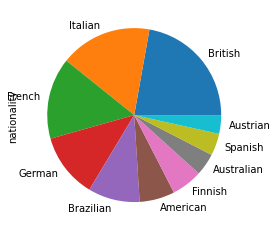

In [12]:
#Top 10 driver nationalities
df.nationality.value_counts()[:10].plot.pie()

<AxesSubplot:xlabel='ageAtRace', ylabel='Count'>

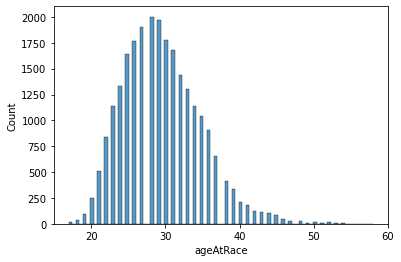

In [13]:
#Age distribution at time of race
sns.histplot(df.ageAtRace)

<AxesSubplot:ylabel='country'>

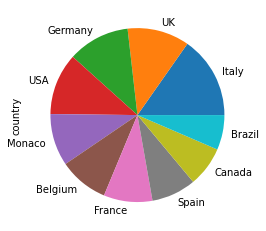

In [14]:
#Top 10 countries where GPs are located
df.country.value_counts()[:10].plot.pie()

<AxesSubplot:xlabel='q1', ylabel='Density'>

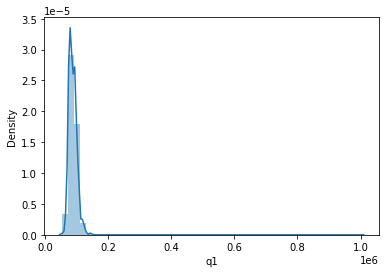

In [15]:
sns.distplot(qualifying["q1"])

In [16]:
print("Skewness: %f" % qualifying["q1"].skew())
print("Kurtosis: %f" % qualifying["q1"].kurt())

#High Kurtosis indicates the presence of outliers

Skewness: 21.638917
Kurtosis: 1241.764964


In [17]:
#Standarize q1 data
q1_scaled = StandardScaler().fit_transform(qualifying["q1"][:, np.newaxis]);
low_range = q1_scaled[q1_scaled[:, 0].argsort()][:10]
high_range = q1_scaled[q1_scaled[:, 0].argsort()][-10:]

print("Low range of the distribution: ")
print(low_range)

print("\nHigh range of the distribution: ")
print(high_range)

Low range of the distribution: 
[[-2.22388066]
 [-2.21537488]
 [-2.20750863]
 [-2.20533422]
 [-2.20450283]
 [-2.20264818]
 [-2.20181679]
 [-2.19849122]
 [-2.1979796 ]
 [-2.19561333]]

High range of the distribution: 
[[ 3.71315511]
 [ 3.72357949]
 [ 3.73982361]
 [ 3.74346895]
 [ 3.80384081]
 [ 3.85647433]
 [ 3.98131107]
 [ 4.03400855]
 [ 4.17022897]
 [58.45086746]]


<AxesSubplot:xlabel='laps', ylabel='Density'>

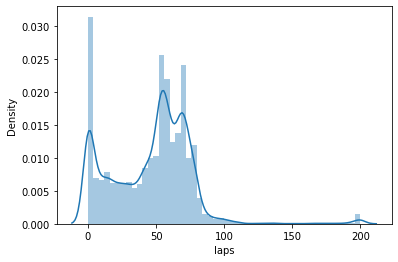

In [18]:
sns.distplot(results["laps"])

In [19]:
print("Skewness: %f" % results["laps"].skew())
print("Kurtosis: %f" % results["laps"].kurt())

Skewness: 0.735936
Kurtosis: 3.654366


<AxesSubplot:xlabel='statusId', ylabel='Density'>

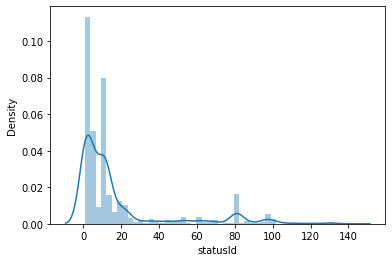

In [20]:
sns.distplot(results["statusId"])

## Complete Data - Multivariate Analysis

In [35]:
df = df.drop(["nationality", "country"], axis = 1)

In [22]:
df.head()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,position,wins,ageAtRace,month,week,day,nationalityId,countryId
0,18,1,1,22.0,1,1,10.0,58,1,2008,1,1,1,1,23,3,11,16,8,1
1,36,1,1,2.0,4,3,6.0,58,1,2007,1,1,3,0,22,3,11,18,8,1
2,338,1,1,2.0,11,6,8.0,58,1,2010,2,1,4,0,25,3,12,28,8,1
3,841,1,1,3.0,2,2,18.0,58,1,2011,1,1,2,0,26,3,12,27,8,1
4,860,1,1,4.0,1,3,15.0,58,1,2012,1,1,3,0,27,3,11,18,8,1


<AxesSubplot:>

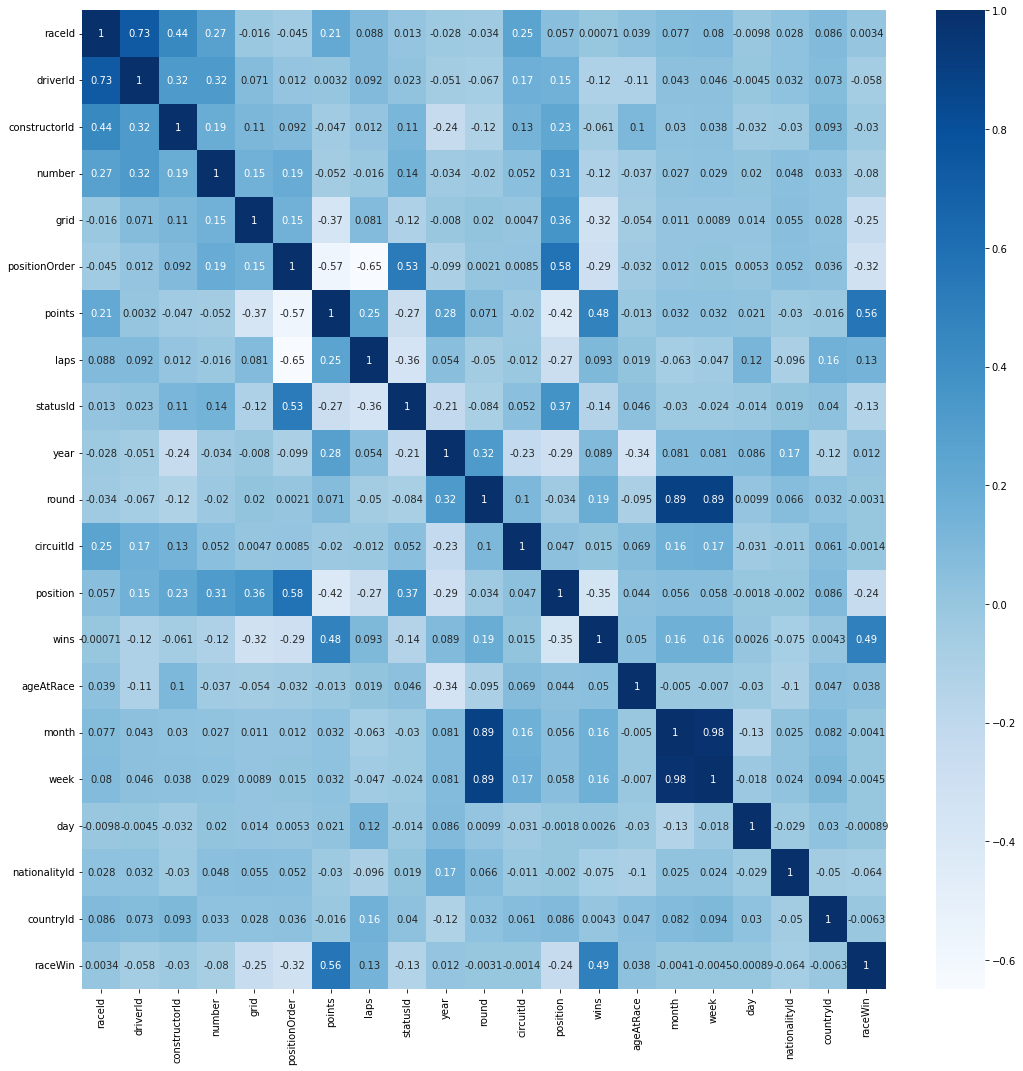

In [159]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cbar = True, annot = True, cmap = 'Blues')

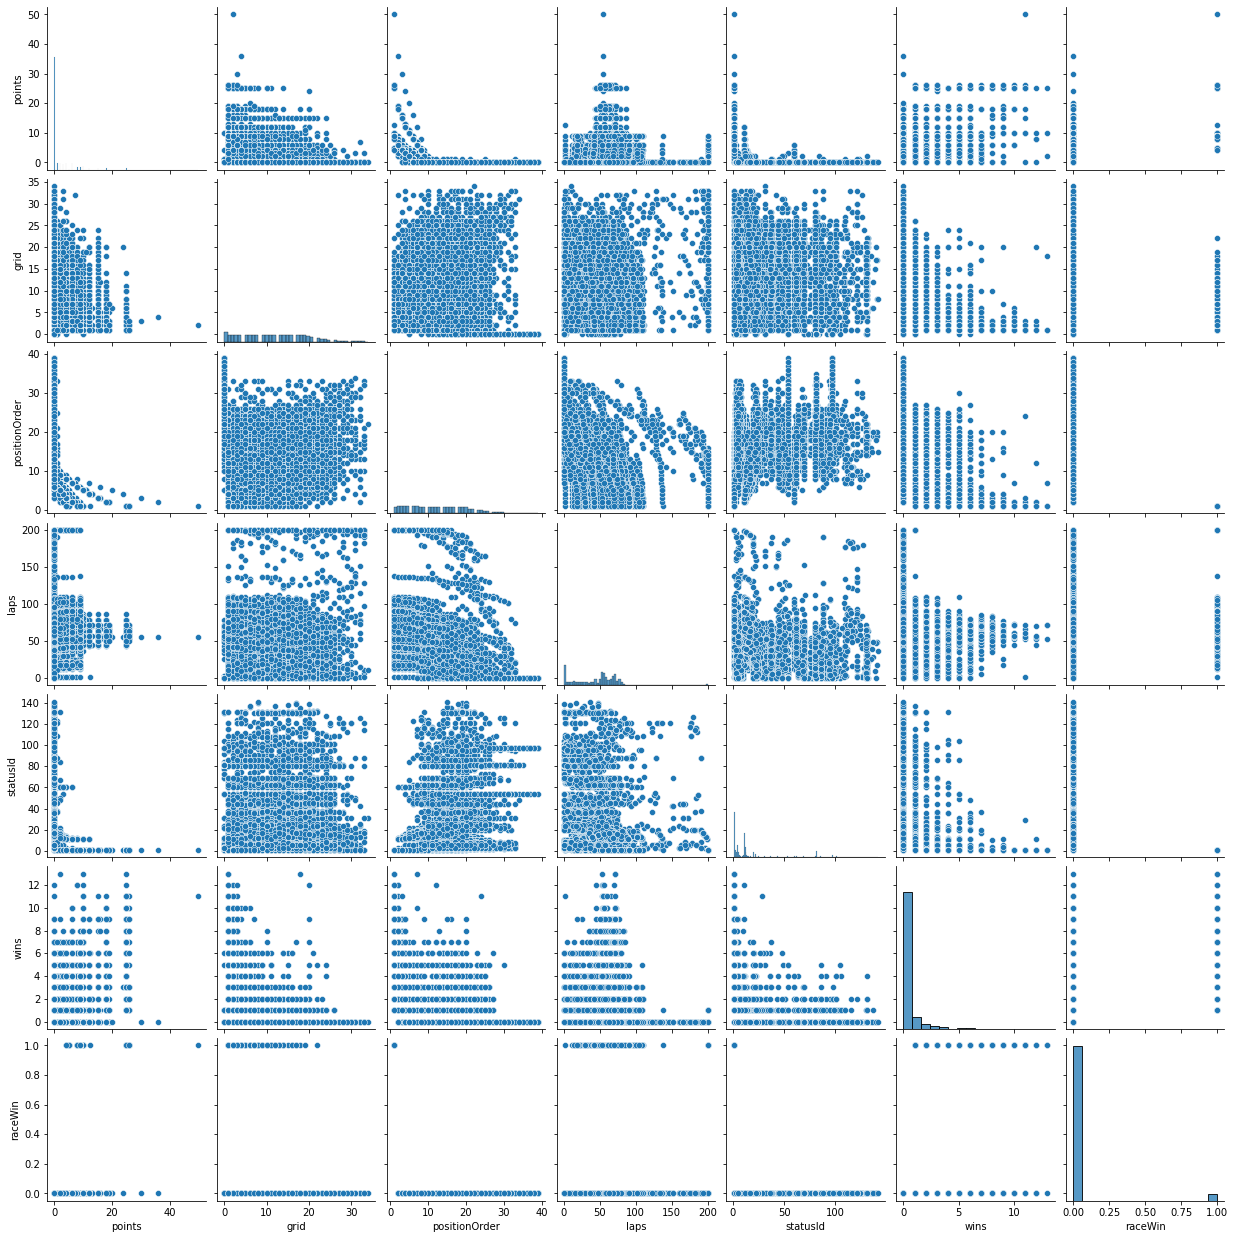

In [160]:
sns.pairplot(df, vars = ["points", "grid", "positionOrder", "laps", "statusId", "wins", "raceWin"])

## Grand Prix Specific Data - Univariate Analysis

In [161]:
df

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,...,position,wins,country,ageAtRace,month,week,day,nationalityId,countryId,raceWin
0,18,1,1,22.0,1,1,10.0,58,1,2008,...,1,1,Australia,23,3,11,16,8,1,1
1,36,1,1,2.0,4,3,6.0,58,1,2007,...,3,0,Australia,22,3,11,18,8,1,0
2,338,1,1,2.0,11,6,8.0,58,1,2010,...,4,0,Australia,25,3,12,28,8,1,0
3,841,1,1,3.0,2,2,18.0,58,1,2011,...,2,0,Australia,26,3,12,27,8,1,0
4,860,1,1,4.0,1,3,15.0,58,1,2012,...,3,0,Australia,27,3,11,18,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,832,697,51,24.0,8,5,2.0,68,12,1951,...,8,0,Spain,48,10,43,28,24,27,0
25187,832,704,154,32.0,14,17,0.0,7,3,1951,...,17,0,Spain,47,10,43,28,18,27,0
25188,832,741,154,34.0,13,8,0.0,63,17,1951,...,30,0,Spain,54,10,43,28,18,27,0
25189,832,783,154,38.0,16,16,0.0,23,5,1951,...,54,0,Spain,46,10,43,28,18,27,0


In [162]:
def circuit_corr_plot(circuitId, circuitName):
    circuit_df = df[df["circuitId"] == circuitId]
    plt.figure(figsize=(18,18))
    sns.heatmap(circuit_df.drop(["circuitId", "month", "countryId"], axis = 1).corr(), cbar = True, annot = True, cmap = 'Blues').set(title = circuitName)

In [163]:
target_circuits = df["circuitId"].value_counts()[:5]

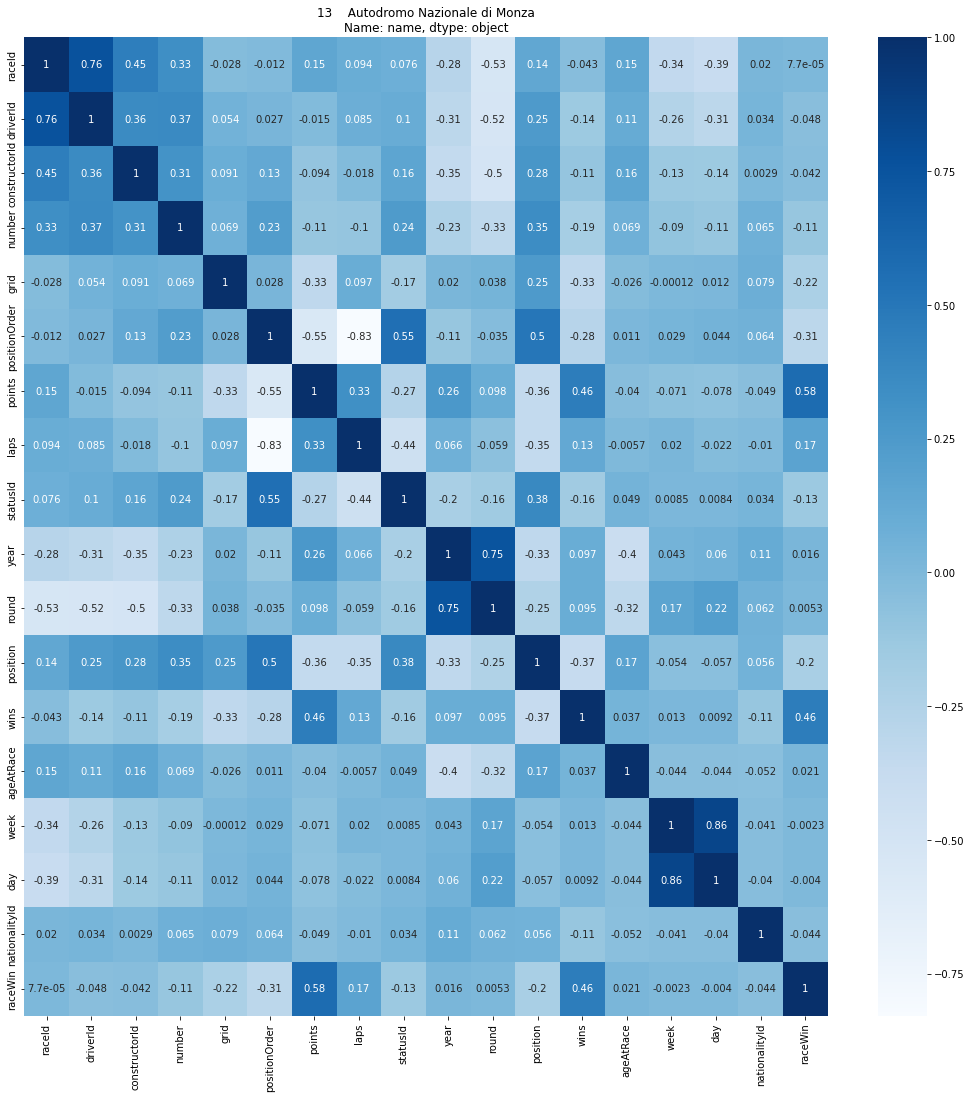

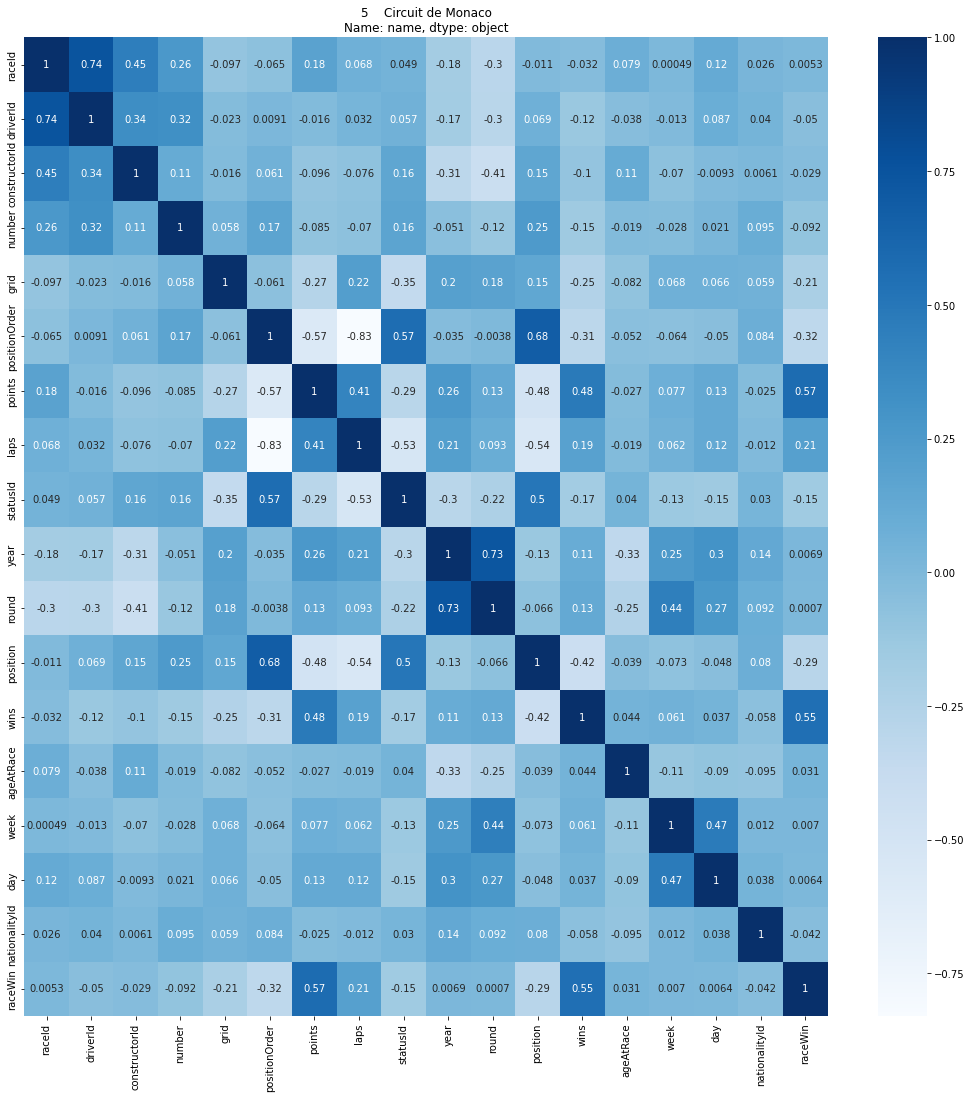

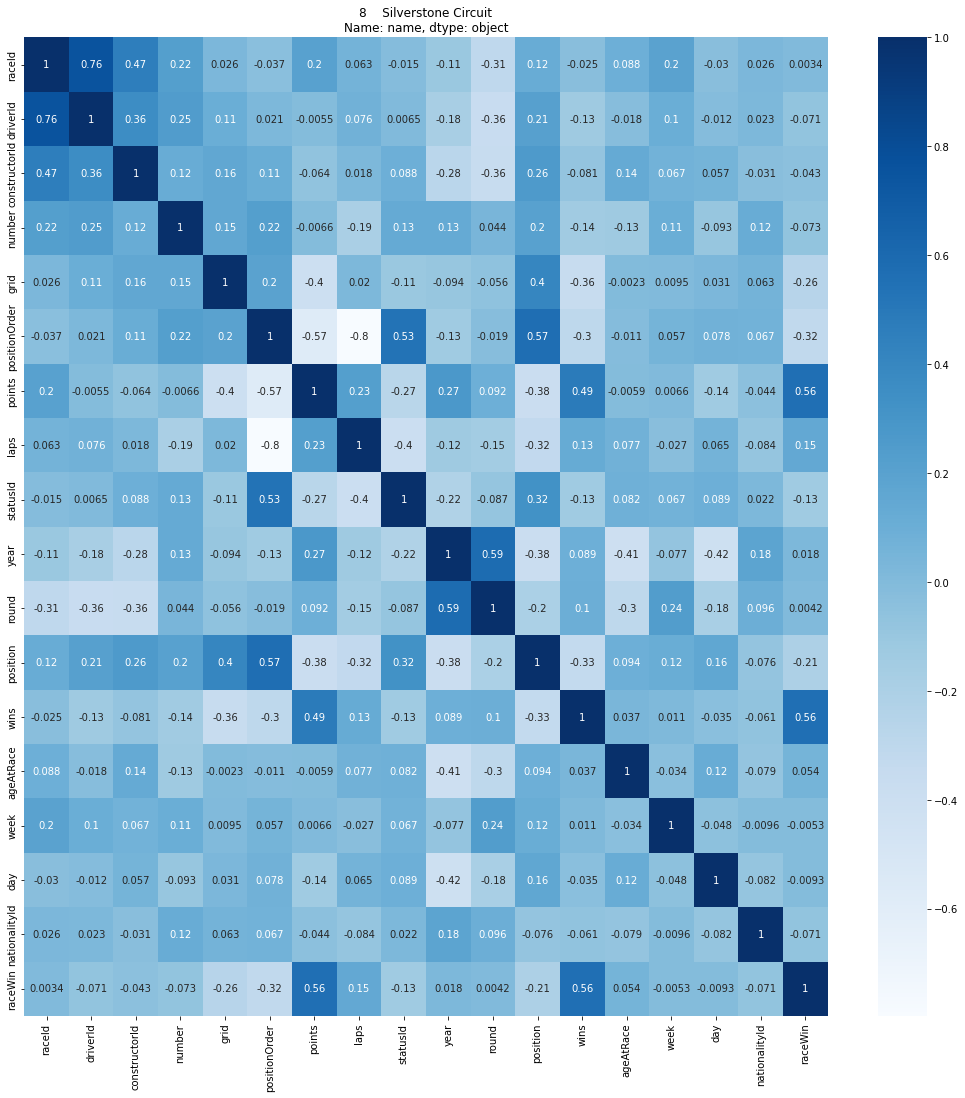

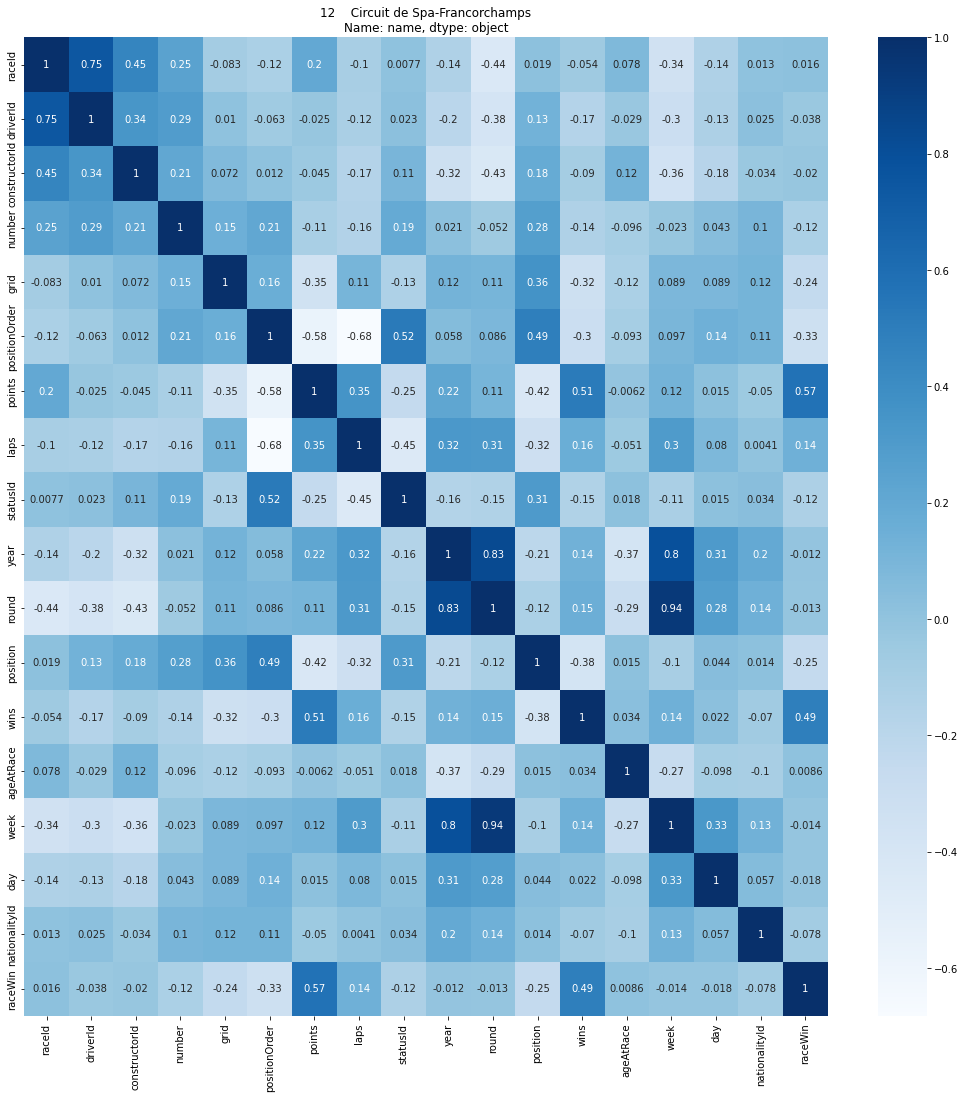

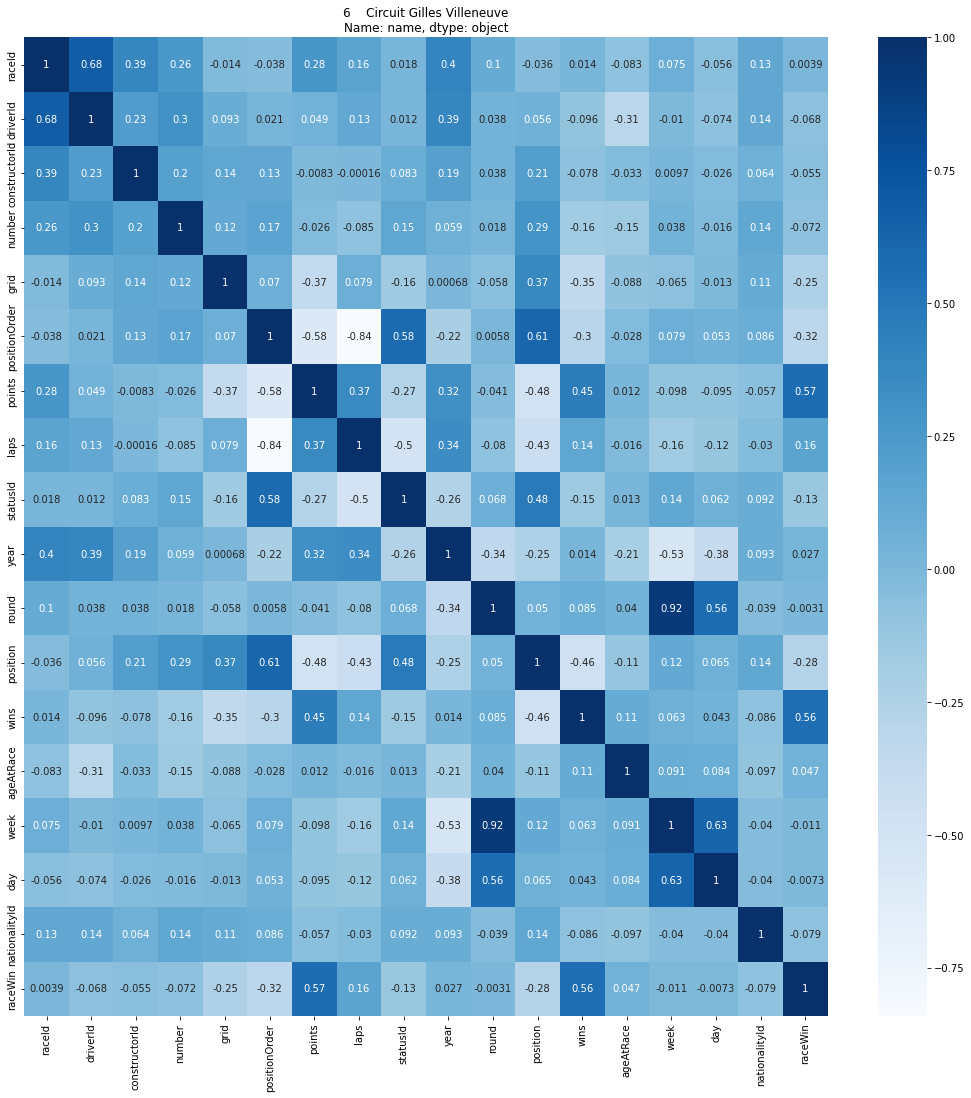

In [164]:
for circuitId in target_circuits.index:
    
    circuitName = str(circuits[circuits["circuitId"] == circuitId].name)
    circuit_corr_plot(circuitId, circuitName)

In [87]:
races_circuits = pd.merge(races.copy().drop(["name"], axis = 1), circuits.copy().drop(["circuitRef", "location", "lat", "lng", "alt", "url"], axis = 1), on = "circuitId")

In [101]:
target_circuits.index

Int64Index([14, 6, 9, 13, 7], dtype='int64')

In [131]:
circuits[circuits["circuitId"] == 14].name

13    Autodromo Nazionale di Monza
Name: name, dtype: object

In [127]:
circuits[circuits["circuitId"] == 18]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
17,18,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.6997,785.0,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...


In [ ]:
#OLD 2

In [52]:
races_circuits = pd.merge(races, circuits, on = "circuitId")
#races_circuits.hist(column = "name_x")

In [85]:
races_circuits["name_y"].value_counts()[:5]

Autodromo Nazionale di Monza    72
Circuit de Monaco               68
Silverstone Circuit             57
Circuit de Spa-Francorchamps    55
Nürburgring                     41
Name: name_y, dtype: int64

In [ ]:
#MERGE DATA FOR 1 TRACK

merge1 = pd.merge(results, races, on = "raceId")
merge2 = pd.merge(merge1, drivers, on = "driverId")
merge3 = pd.merge(merge2, driver_standings, on = "driverId")
merge4 = pd.merge(merge3, constructors, on = "constructorId")
df = pd.merge(merge4, status, on = "statusId")

In [ ]:
#OLD

In [ ]:
lap_times_races_merge = pd.merge(lap_times, races, on = "raceId", how = "outer")
lap_times_drivers_merge = pd.merge(lap_times_races_merge, new_drivers, on = "driverId")
lap_times_drivers_merge

In [ ]:
years = np.sort(lap_times_drivers_merge["year"].unique())[::-1]

In [ ]:
lap_times_drivers_merge.dtypes

In [ ]:
lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2021]

In [ ]:
lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2022]

In [ ]:
year_2021 = lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2021]
year_2021 = year_2021.sort_values(by=["round", "driverId"])
total_rounds_2021 = year_2021["round"].unique()

for current_round in total_rounds_2021:
    print("CURRENT ROUND IS: " + str(current_round))
    race_df = year_2021[year_2021["round"] == current_round]
    race_name = str(race_df["name"].unique()[0])
    print("CURRENT GP IS: " + race_name)
    plot_race(race_df, race_name)
    #print(year_2021[year_2021["round"] == current_round])

In [ ]:
bahrain_2021 = lap_times_drivers_merge[lap_times_drivers_merge["raceId"] == 1052]
bahrain_2021

In [ ]:
def plot_race (df, race):
    
    scatter_drivers = px.scatter(
    data_frame = df, 
    x = "lap", 
    y = "milliseconds", 
    color = "code",
    title = race,
    trendline = "rolling",
    trendline_options = dict(window = 1))
    
    pio.show(scatter_drivers)

In [ ]:
pit_stops.head()

In [ ]:
pit_stops.head()

In [ ]:
qualifying.head()

In [ ]:
races.head()

In [ ]:
constructor_races_merge = pd.merge(constructor_results, new_races, on="raceId")
constructor_races_merge = pd.merge(constructor_races_merge, new_constructors, on="constructorId")
constructor_races_merge

In [ ]:
year_2020_races = constructor_races_merge[constructor_races_merge["year"] == 2021]
year_2020_races

In [ ]:
scatter = px.scatter(
    data_frame = year_2020_races, 
    x = "date", 
    y = "points", 
    color = "name_y", 
    color_discrete_map = {"McLaren": "orange", 
                          "Williams": "cyan", 
                          "Renault": "yellow", 
                          "Ferrari": "red", 
                          "Red Bull": "darkblue",
                          "Alfa Romeo": "lightgreen",
                          "Mercedes": "darkgrey",
                          "Haas F1 Team": "lightgrey",
                          "Racing Point": "pink",
                          "AlphaTauri": "blue",
                          "Alpine F1 Team": "pink",
                          "Aston Martin": "darkgreen"},
    trendline = "rolling",
    trendline_options=dict(window=3))
pio.show(scatter)

In [ ]:
results.head()

In [ ]:
sprint_results.head()

In [ ]:
year_2020 = races[races['year'] == 2020]
year_2020_index = year_2020.index
year_2020_dates = year_2020['date']

year_2020_constructors = pd.DataFrame()

year_2020_constructors = constructor_standings[constructor_standings['raceId'].isin(year_2020_index)]

#for race_index in year_2020_index:
#    current_race = constructor_standings[constructor_standings['raceId'] == race_index]
#    year_2020_constructors = year_2020_constructors.append(current_race)

print(year_2020_constructors)